In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt
import math

In [308]:
bag = bagreader('2024-09-12-10-22-03.bag')

[INFO]  Data folder 2024-09-12-12-43-45 already exists. Not creating.


## Mission and State

#### Mission

In [295]:
segment = pd.read_csv('/home/soslab/Desktop/NB_09_12_2024/2024-09-12-10-22-03/transformed_points.csv')
odom = pd.read_csv('/home/soslab/Desktop/NB_09_12_2024/2024-09-12-10-22-03/alpha_rise-odometry-filtered-local.csv')
gps = pd.read_csv('/home/soslab/Desktop/NB_09_12_2024/2024-09-12-10-22-03/alpha_rise-gps-odometry.csv')

In [296]:
x = segment['x'].tolist()
y = segment['y'].tolist()

x_odom = odom['pose.x'].to_list()
y_odom = odom['pose.y'].to_list()
z_odom = odom['pose.z'].to_list()

x_gps = gps['pose.pose.position.x']
y_gps = gps['pose.pose.position.y']


In [291]:
x_resurface =[]
y_resurface =[]
for i in range(len(z_odom)):
    if (z_odom[i]) > -0.87:
        x_resurface.append(x_odom[i])
        y_resurface.append(y_odom[i])


In [292]:
max(z_odom)

-0.8516593697638484

In [293]:
len(x_resurface)

31

(-13.427075894262078, 66.50373607069612, 68.79704271195403, 383.62193221245707)

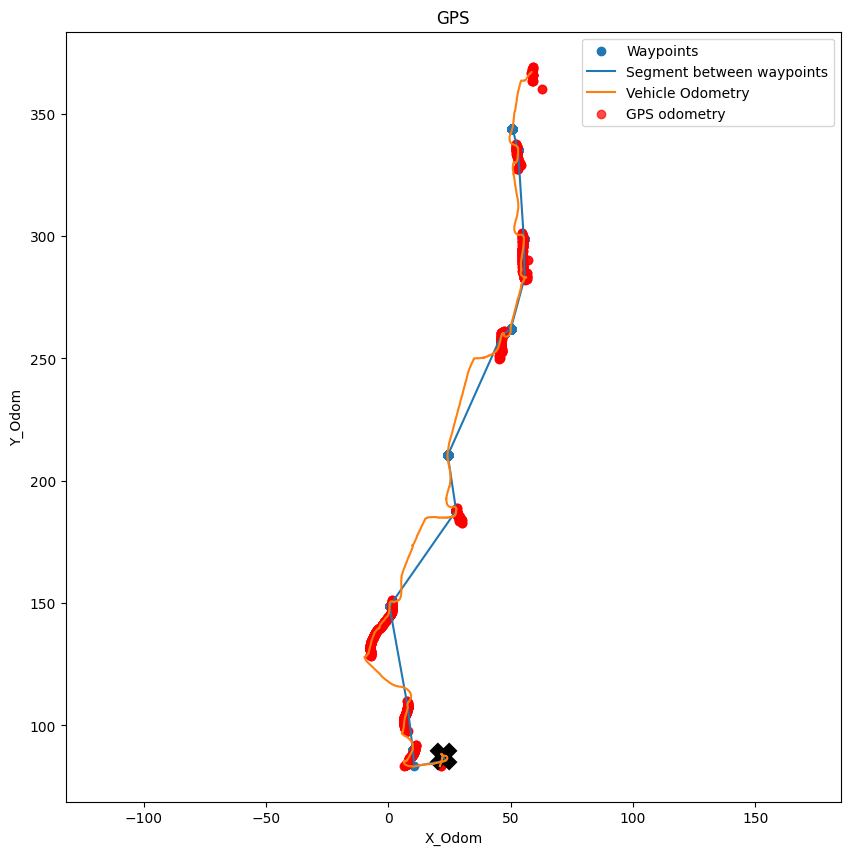

In [327]:
plt.figure(figsize=(10,10))
# plt.subplot(1,2,1)
plt.title("GPS")
plt.scatter(x[::2], y[::2], label = "Waypoints")

plt.plot(x[::2], y[::2], label = "Segment between waypoints")

plt.plot(x_odom, y_odom, label= "Vehicle Odometry")
# plt.scatter(x_resurface, y_resurface, color='r', alpha=0.7)
plt.scatter(x_gps, y_gps, color='r', alpha=0.7, label = "GPS odometry")
plt.scatter(x[::2][0], y[::2][0], marker= 'x', linewidths=20, color='black')

plt.ylabel("Y_Odom")

plt.xlabel("X_Odom")
plt.legend()
plt.axis('equal')


# plt.subplot(1,2,2)
# plt.title("Z-ODOM")
# plt.scatter(x[::2], y[::2], label = "Waypoints")
# plt.plot(x[::2], y[::2], label = "Segment between waypoints")

# plt.plot(x_odom, y_odom, label= "Vehicle Odometry")
# plt.scatter(x_resurface, y_resurface, color='r', alpha=0.7, label="Resurfacing")
# # plt.scatter(x_gps, y_gps, color='r', alpha=0.7, label = "GPS odometry")

# plt.ylabel("Y_Odom")

# plt.xlabel("X_Odom")
# plt.axis('equal')
# plt.legend()

#### State 

In [309]:
caller = bag.message_by_topic('/alpha_rise/helm/change_state_caller')
current_state = bag.message_by_topic('/alpha_rise/helm/current_state')

No data on the topic:/alpha_rise/helm/change_state_caller


In [157]:
caller_csv = pd.read_csv(caller)
current_state_csv = pd.read_csv(current_state)

([0, 1, 2],
 [Text(0, 0, 'start'), Text(0, 1, 'survey_3d'), Text(0, 2, '/mvp_gui_node')])

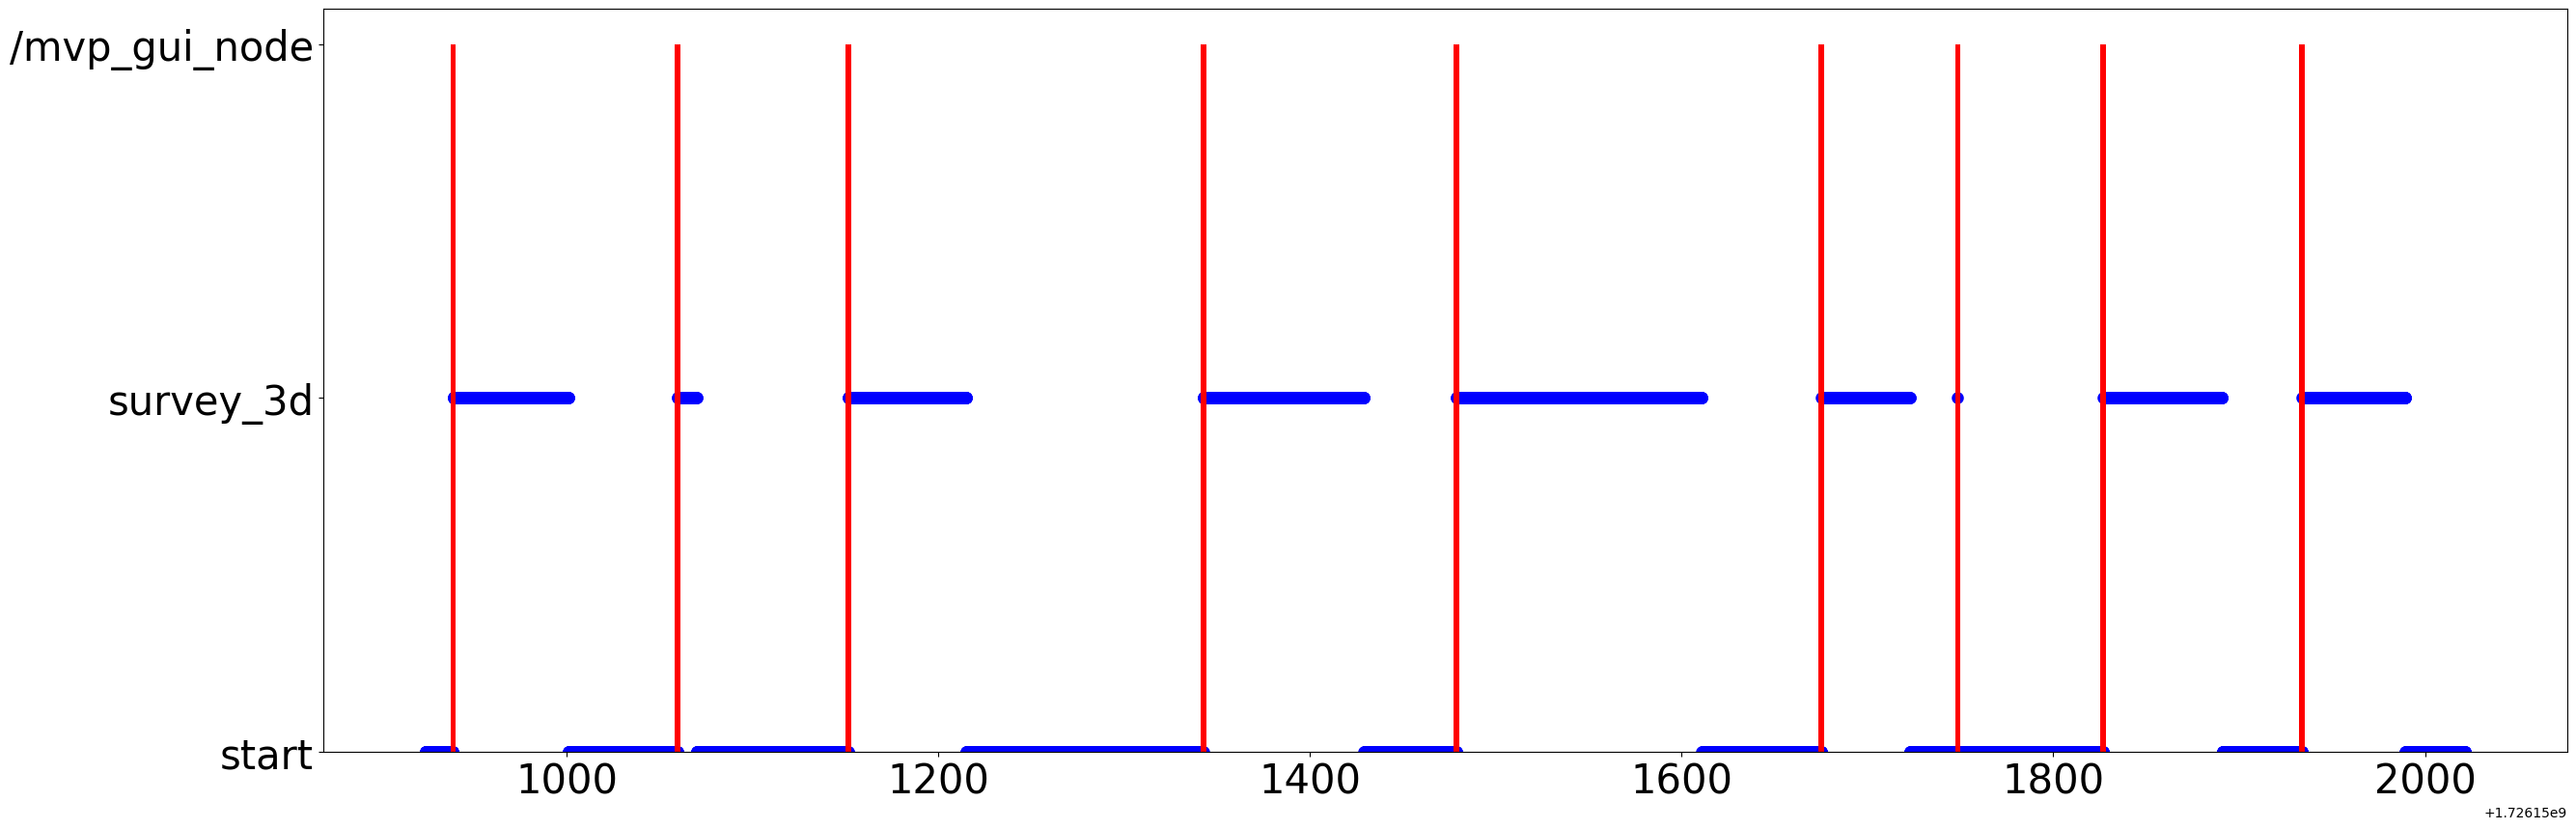

In [161]:
time = caller_csv['Time']
caller = caller_csv['data']
state = current_state_csv['name']
time_ = current_state_csv['Time']
plt.figure(figsize=(30,10))

plt.scatter(time_, state, linewidth = 3, color="blue")
plt.bar(time, caller, width=3, color='red')

plt.xticks(size= 30)
plt.yticks(size =30)

## Surge, Heading, Pitch, Depth

In [39]:
process_value_csv = bag.message_by_topic('/alpha_rise/controller/process/value')
process_set_point_csv = bag.message_by_topic('/alpha_rise/controller/process/set_point')

process_value = pd.read_csv(process_value_csv)
process_set_point = pd.read_csv(process_set_point_csv)

### Surge

In [44]:
surge_value_time = process_value['Time'].tolist()
surge_value = process_value['velocity.x'].tolist()

surge_setpoint_time = process_set_point['Time'].tolist()
surge_setpoint = process_set_point['velocity.x'].tolist()

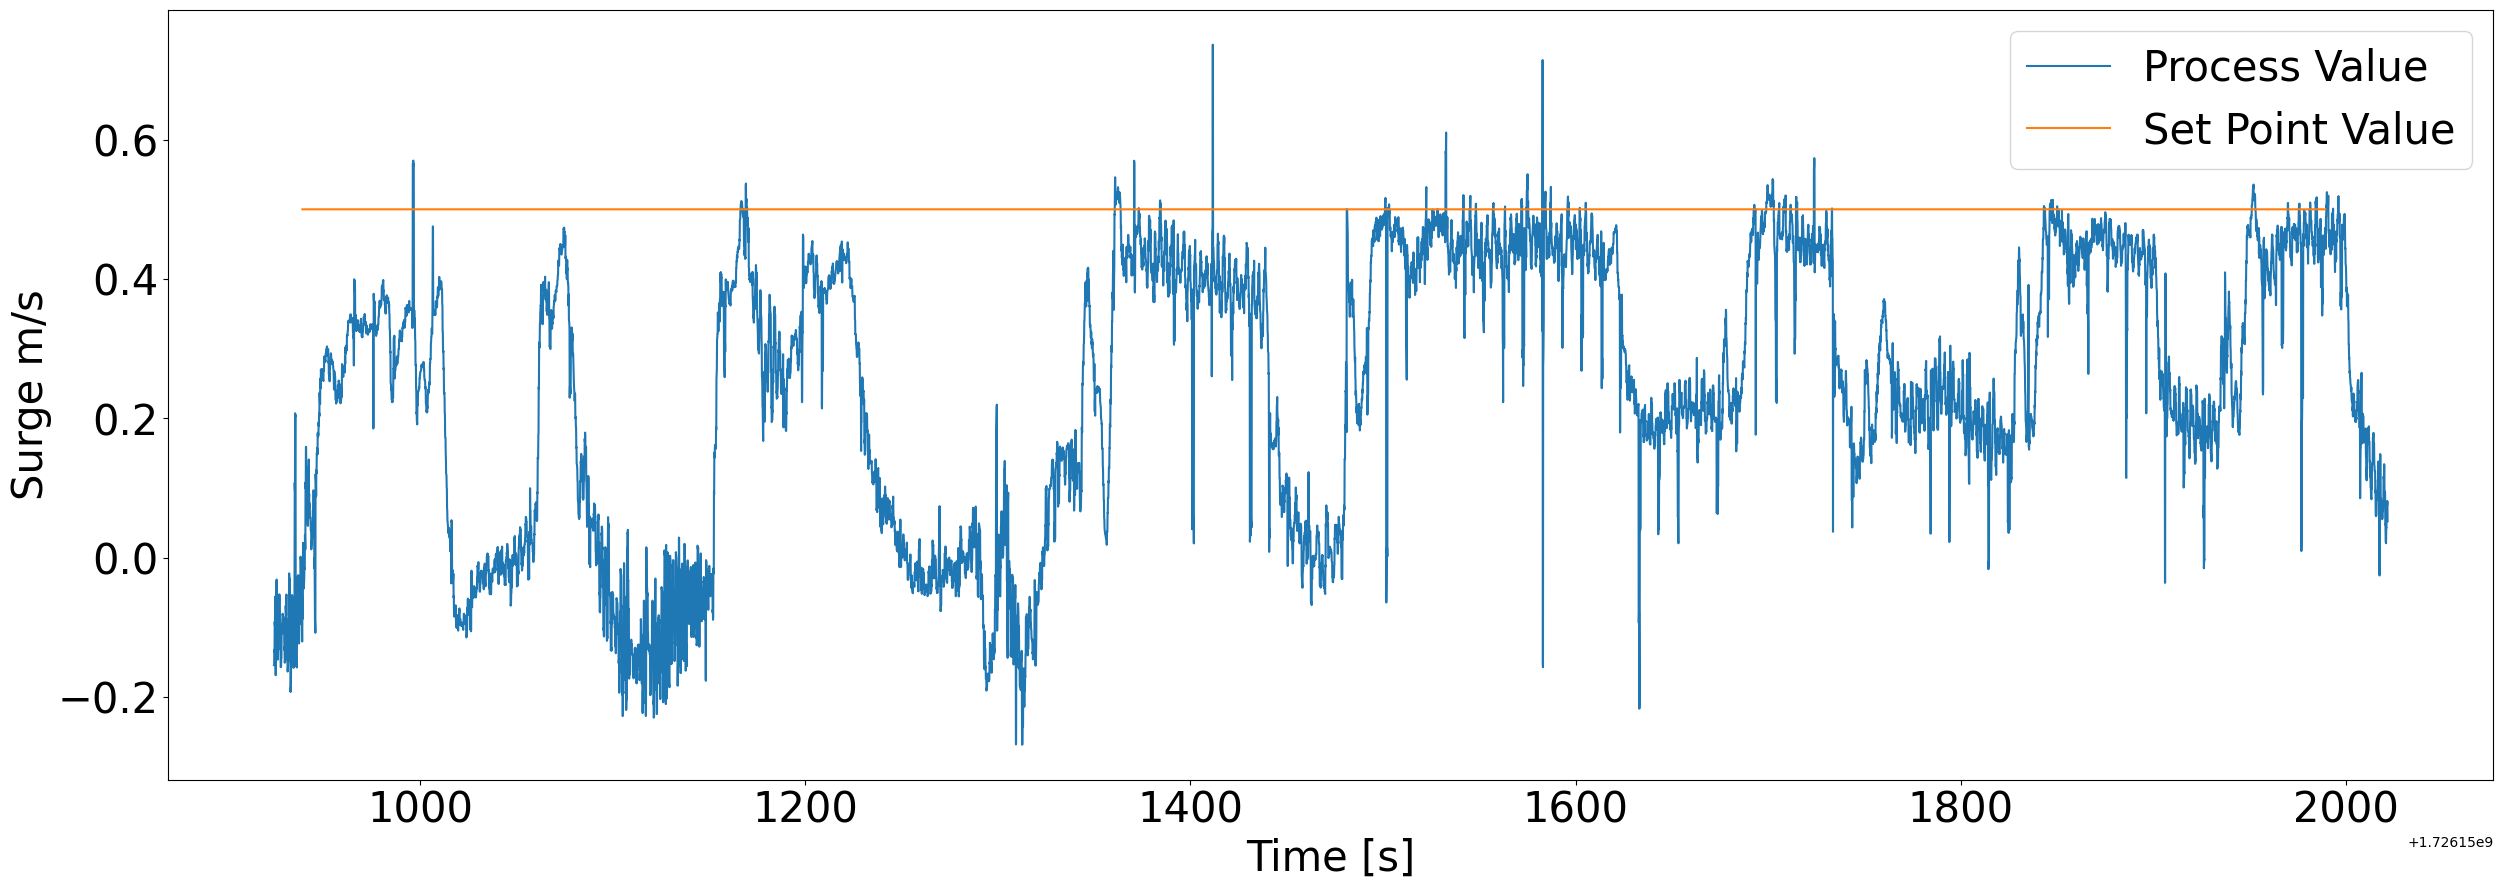

In [71]:
plt.figure(figsize=(30,10))
plt.plot(surge_value_time, surge_value, label = "Process Value")
plt.plot(surge_setpoint_time, surge_setpoint, label = "Set Point Value")
plt.xlabel('Time [s]', size=30)
plt.ylabel('Surge m/s', size=30)
plt.xticks(size= 30)
plt.yticks(size =30)
plt.legend(fontsize=30)

# plt.figure(figsize=(30,10))
# plt.plot(surge_setpoint_time, surge_setpoint)
# plt.xlabel('Time [s]')
# plt.ylabel('Surge m/s')

### Heading

In [50]:
heading_value_time = process_value['Time'].tolist()
heading_value = process_value['orientation.z'].tolist()

heading_setpoint_time = process_set_point['Time'].tolist()
heading_setpoint = process_set_point['orientation.z'].tolist()

In [56]:
heading_value = [math.degrees(heading) for heading in heading_value]
heading_setpoint = [math.degrees(heading) for heading in heading_setpoint]

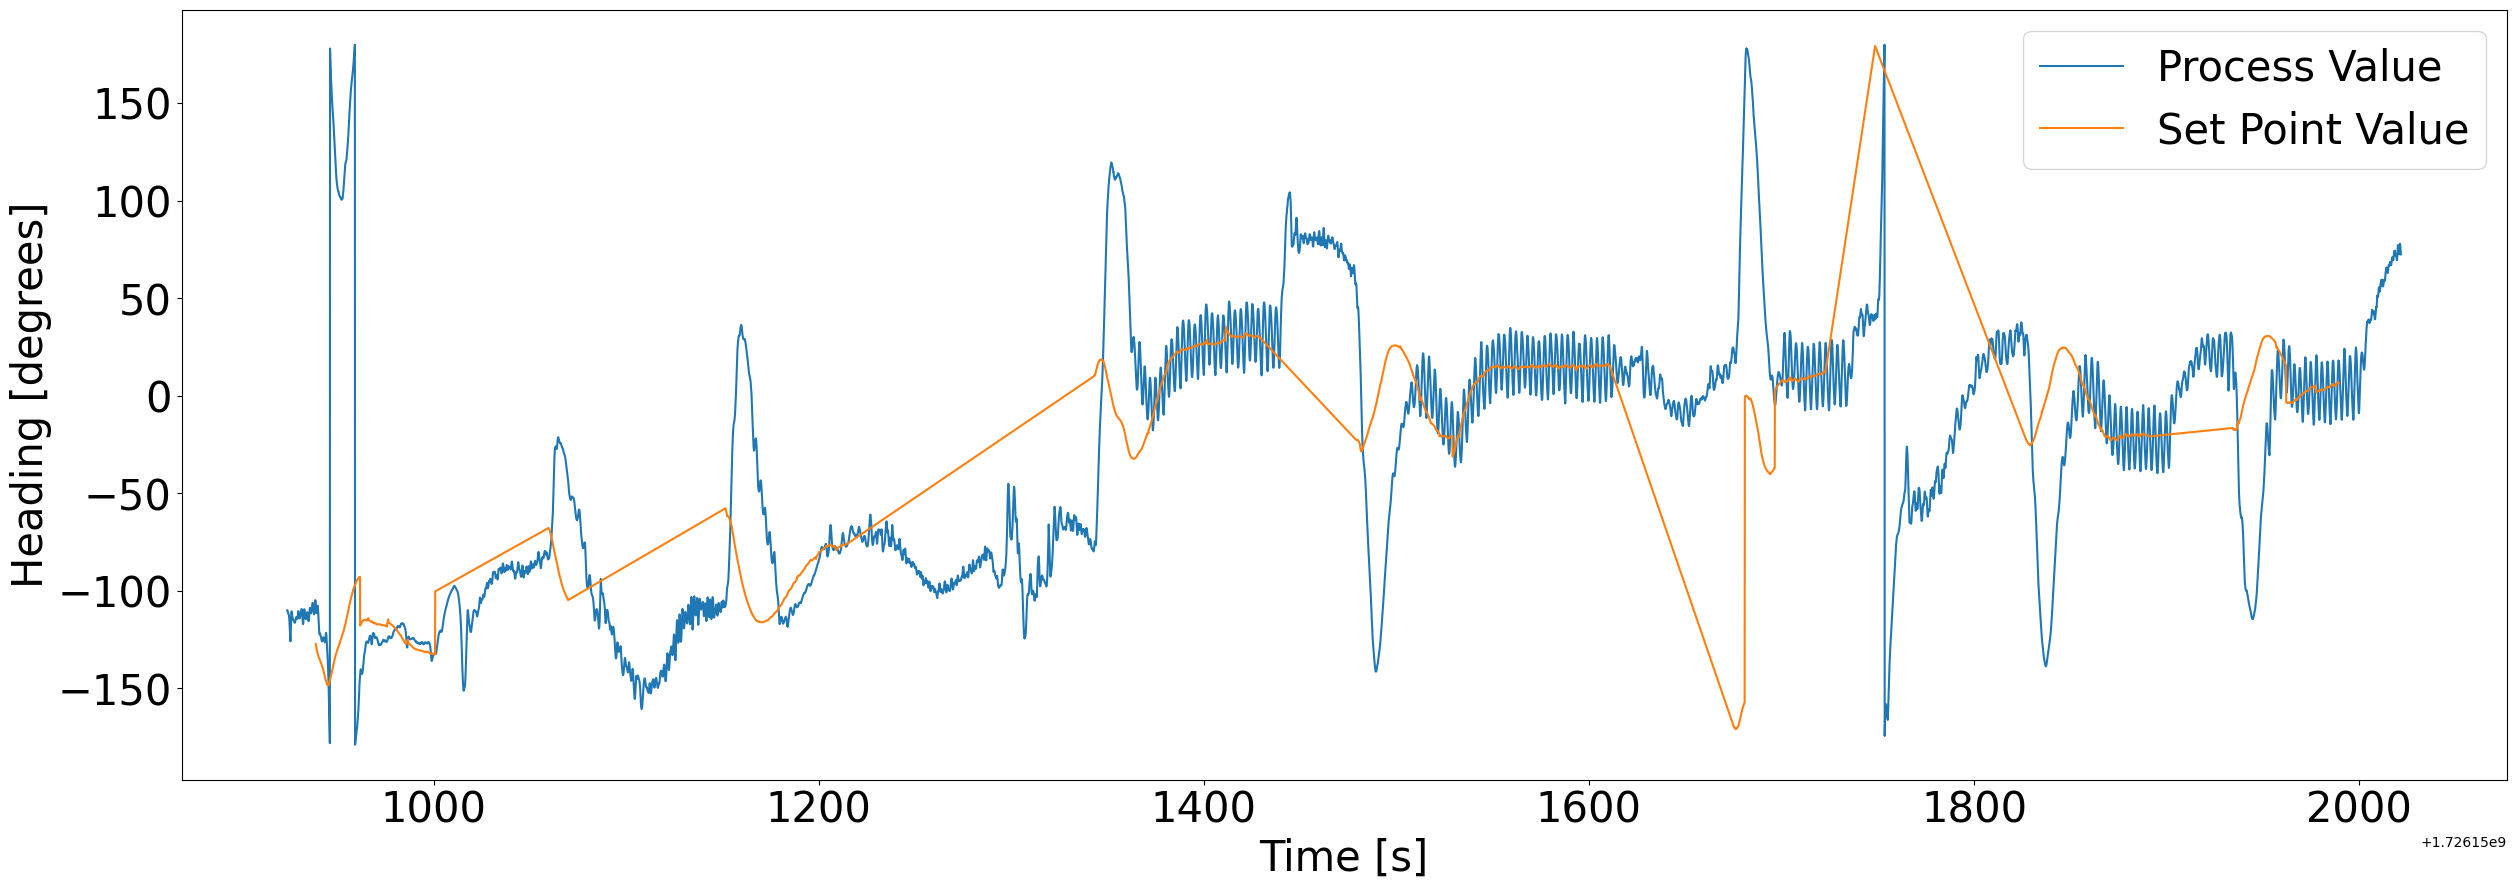

In [72]:
plt.figure(figsize=(30,10))
plt.plot(heading_value_time, heading_value, label = "Process Value")
plt.plot(heading_setpoint_time, heading_setpoint, label = "Set Point Value")
plt.xlabel('Time [s]',size =30)
plt.ylabel('Heading [degrees]',size=30)
plt.xticks(size= 30)
plt.yticks(size =30)
plt.legend(fontsize=30)

### Pitch

In [58]:
pitch_value_time = process_value['Time'].tolist()
pitch_value = process_value['orientation.y'].tolist()

pitch_setpoint_time = process_set_point['Time'].tolist()
pitch_setpoint = process_set_point['orientation.y'].tolist()

In [59]:
pitch_value = [math.degrees(heading) for heading in pitch_value]
pitch_setpoint = [math.degrees(heading) for heading in pitch_setpoint]

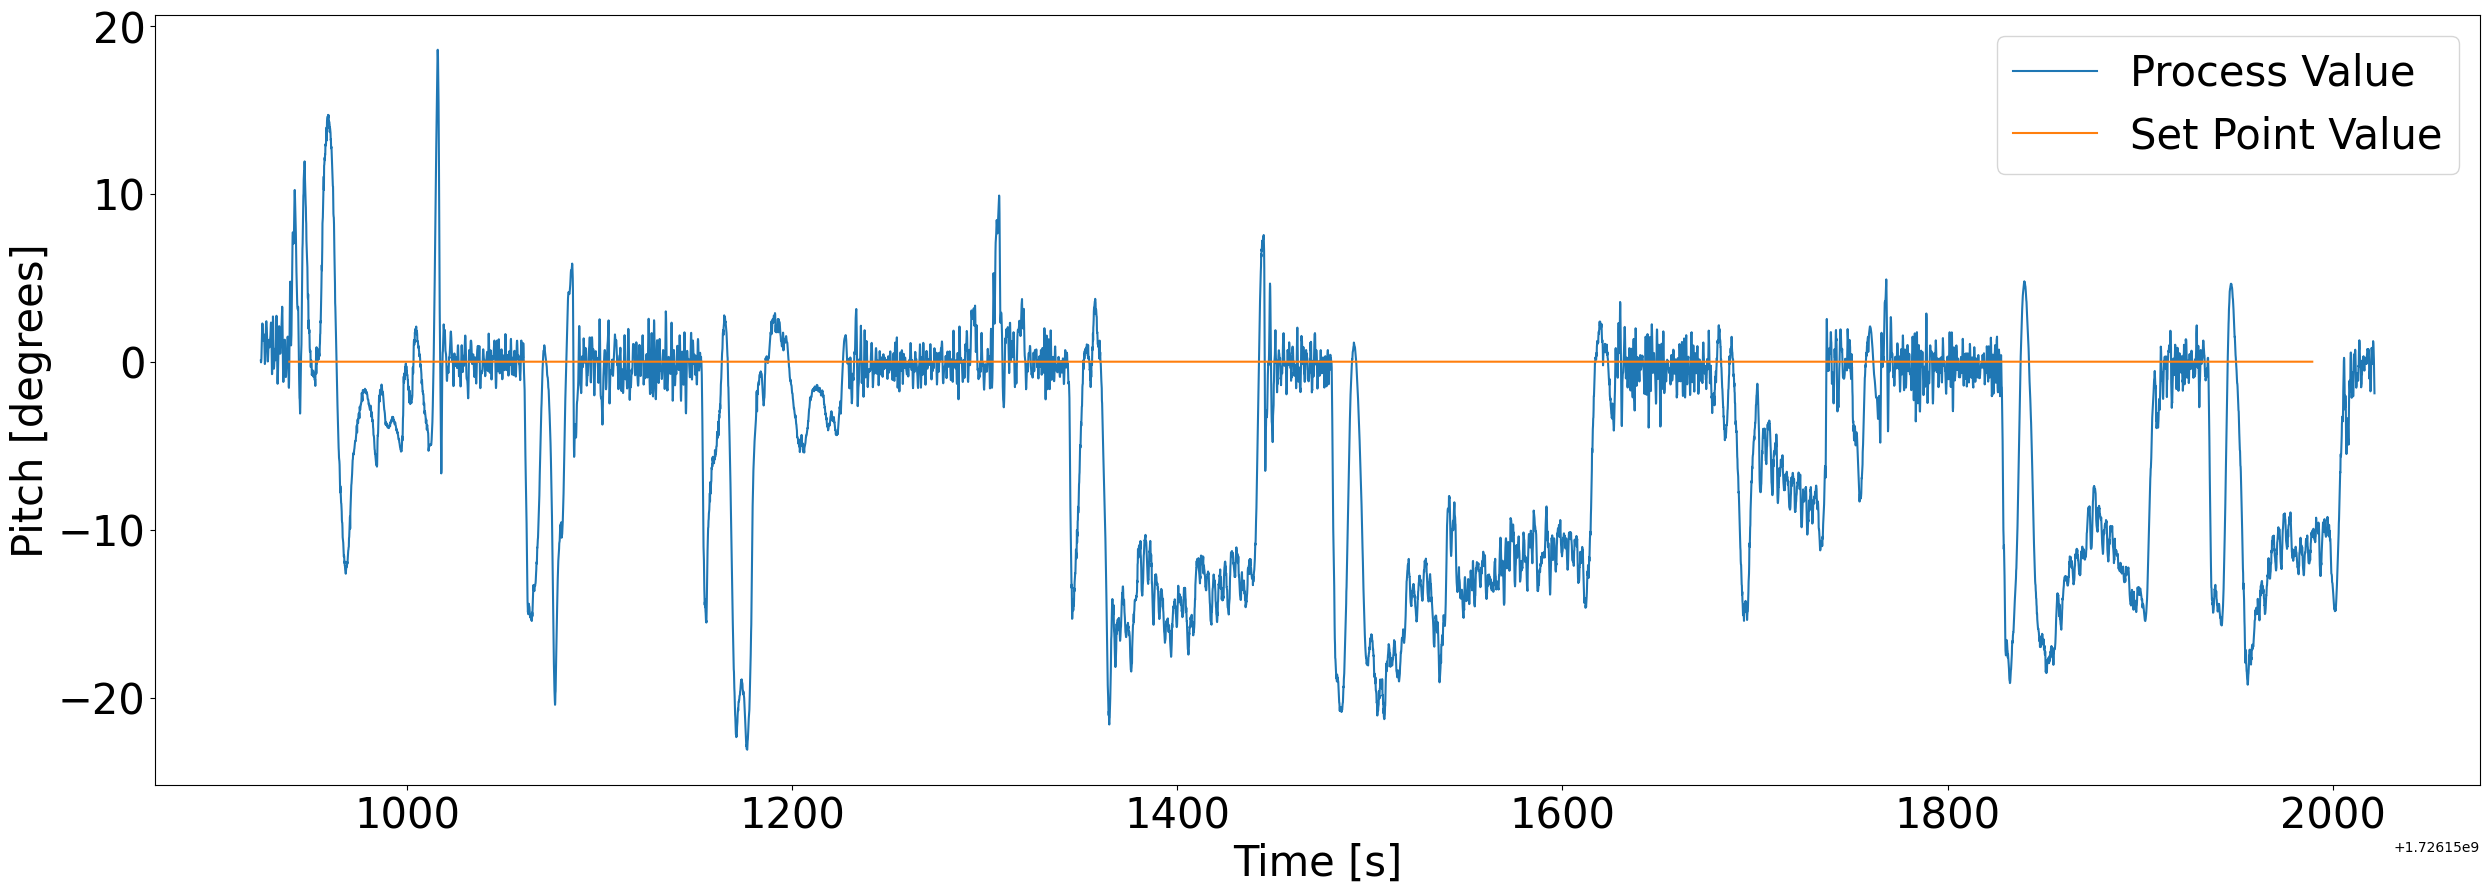

In [73]:
plt.figure(figsize=(30,10))
plt.plot(pitch_value_time, pitch_value, label = "Process Value")
plt.plot(pitch_setpoint_time, pitch_setpoint, label = "Set Point Value")
plt.xlabel('Time [s]',size =30)
plt.ylabel('Pitch [degrees]',size=30)
plt.xticks(size= 30)
plt.yticks(size =30)
plt.legend(fontsize=30)

### Depth

In [62]:
depth_value_time = process_value['Time'].tolist()
depth_value = process_value['position.z'].tolist()

depth_setpoint_time = process_set_point['Time'].tolist()
depth_setpoint = process_set_point['position.z'].tolist()

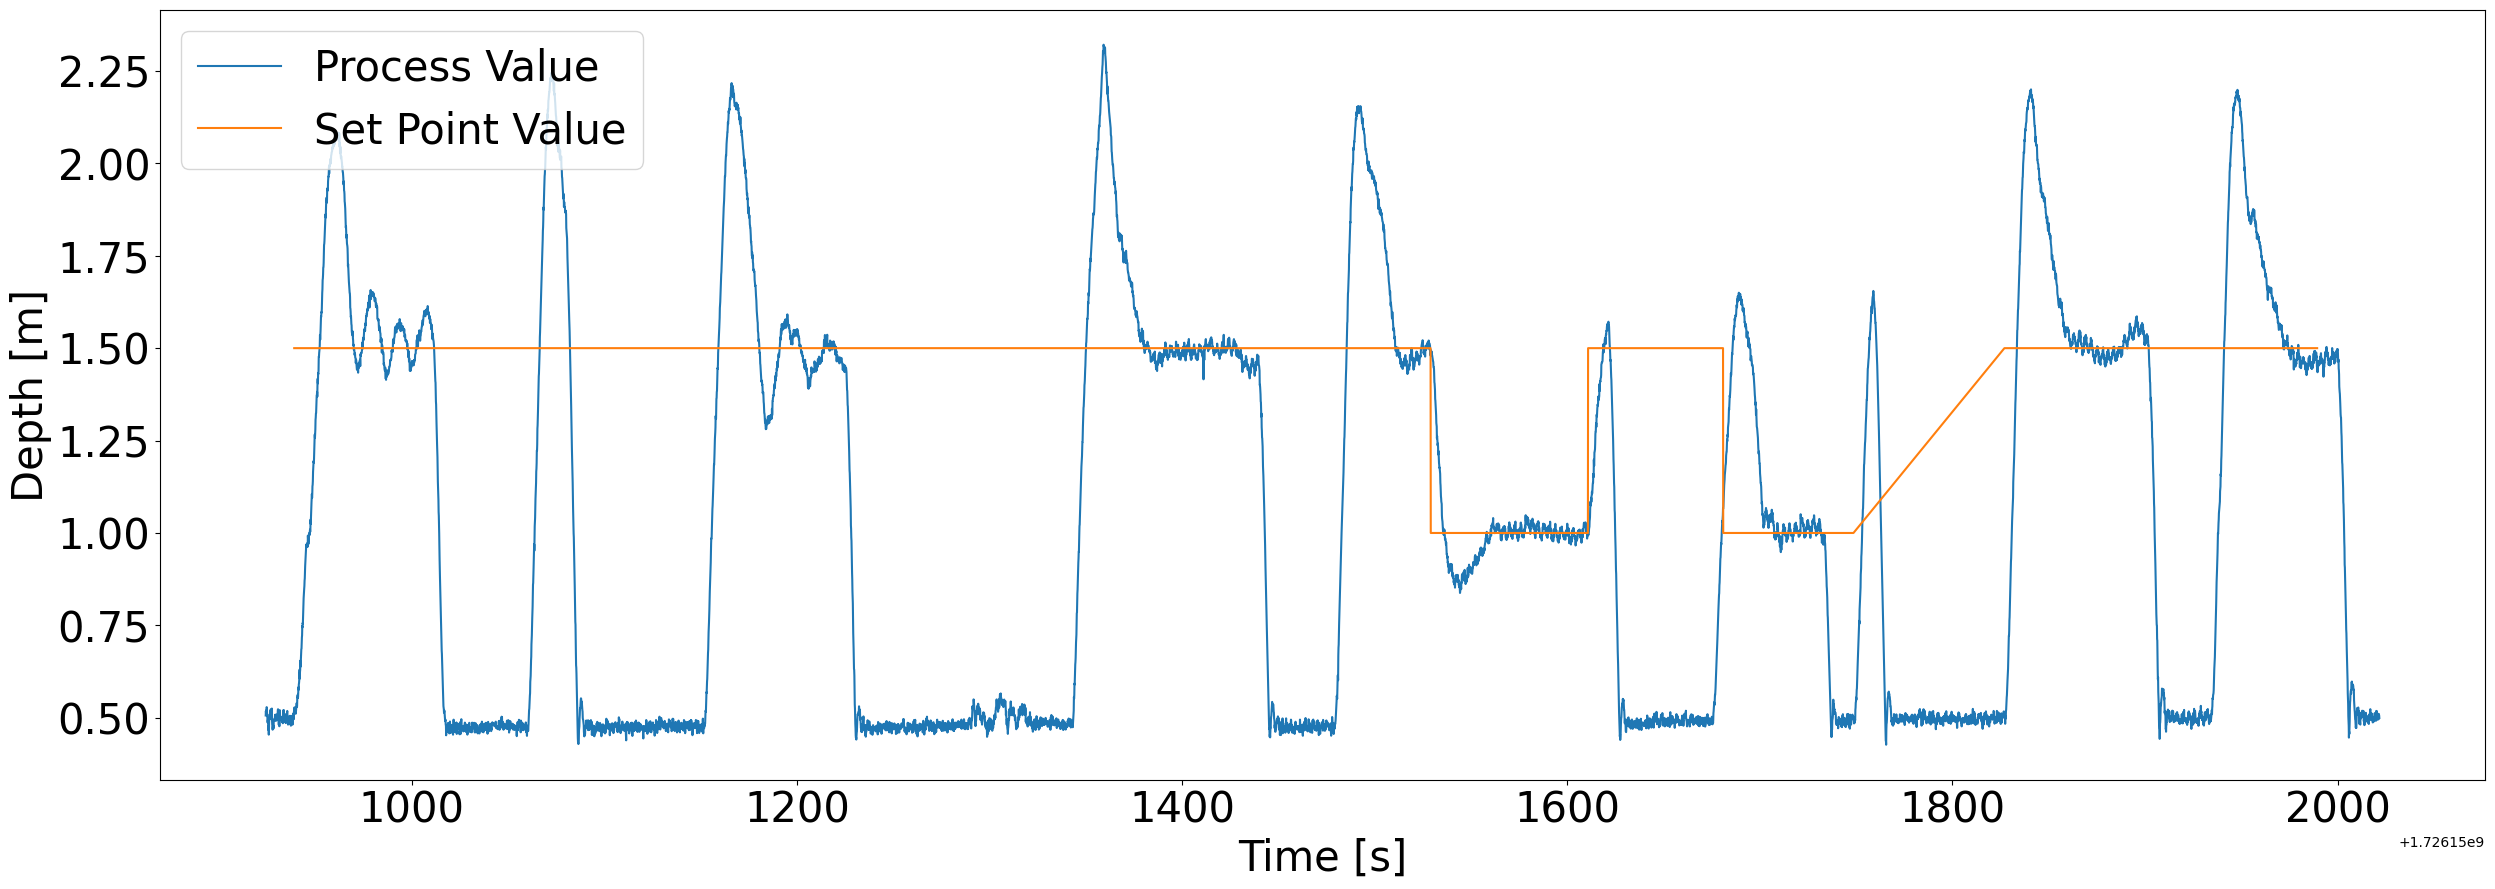

In [74]:
plt.figure(figsize=(30,10))
plt.plot(depth_value_time, depth_value, label = "Process Value")
plt.plot(depth_setpoint_time, depth_setpoint, label = "Set Point Value")
plt.xlabel('Time [s]',size =30)
plt.ylabel('Depth [m]',size=30)
plt.xticks(size= 30)
plt.yticks(size =30)
plt.legend(fontsize=30)
